<h2>Task - 7<h/2> 
    
<h2> Register Id: SIRSS2292
    
    
Name: Mahesh Deshmukh</h2>

Q2. Kaggle Competition:

Introduction:
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science
students who have completed an online course in machine learning and are looking to expand their skill set before trying a
featured competition.

Description:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling
or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences
price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition
challenges you to predict the final price of each home.

Kaggle Competition Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 81)

In [5]:
test_data.shape

(1459, 80)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [7]:
# data clean
train_data.duplicated().sum()

0

In [8]:
test_data.duplicated().sum()

0

In [9]:
# deal with missing data
missing = train_data.isnull().sum()

missing_value = [col for col in missing if col>0]
missing_col = [col for col in train_data.columns
                     if train_data[col].isnull().any() ]

In [10]:
pd.DataFrame(missing_col,missing_value)

,0
259,LotFrontage
1369,Alley
8,MasVnrType
8,MasVnrArea
37,BsmtQual
37,BsmtCond
38,BsmtExposure
37,BsmtFinType1
38,BsmtFinType2
1,Electrical


here, Alley, FireplaceQu, PoolQC, Fence, MiscFeature are lot of data missing. so simply drop these columns

In [11]:
drop_col = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for i in drop_col:
    train_data.drop(labels=i,axis=1,inplace=True)

In [12]:
find_data_type = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

cat_col = []
num_col = []
for j in find_data_type:
    if train_data[j].dtype == object:
        cat_col.append(j)
    else:
        num_col.append(j)

In [13]:
cat_col

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [14]:
# missing value of categorical data
for k in cat_col:
    freq = train_data[k].mode()[0]
    train_data[k] = train_data[k].fillna(freq)

In [15]:
# missing value of numerical data
num_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
for m in num_col:
    avg = train_data[m].mean()
    train_data[m].replace(np.nan,avg,inplace=True)

In [17]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

At these position, we are clean data in train data.

In [18]:
missing_test = test_data.isnull().sum()
missing_value = [col for col in missing_test if col>0]
missing_col = [col for col in test_data.columns
                     if test_data[col].isnull().any() ]

In [19]:
pd.DataFrame(missing_col,missing_value,columns=['missing value'])

,missing value
4,MSZoning
227,LotFrontage
1352,Alley
2,Utilities
1,Exterior1st
1,Exterior2nd
16,MasVnrType
15,MasVnrArea
44,BsmtQual
45,BsmtCond


here, Alley, FireplaceQu, PoolQC, Fence, MiscFeature are lot of data missing, simply drop these columns

In [20]:
drop_col = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for i in drop_col:
    test_data.drop(labels=i,axis=1,inplace=True)

In [21]:
find_data_type = ['MSZoning','LotFrontage','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','SaleType']
cat_col = []
num_col = []
for j in find_data_type:
    if test_data[j].dtype == object:
        cat_col.append(j)
    else:
        num_col.append(j)

In [22]:
cat_col

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [23]:
# missing value of categorical data
for k in cat_col:
    freq = test_data[k].mode()[0]
    test_data[k] = test_data[k].fillna(freq)

In [24]:
# missing value of numerical data
num_col

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [25]:
for m in num_col:
    avg = test_data[m].mean()
    test_data[m].replace(np.nan,avg,inplace=True)

In [26]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

At these position, we are clean data in test data.

In [27]:
train_data.shape

(1460, 76)

In [28]:
test_data.shape

(1459, 75)

### data visualisation

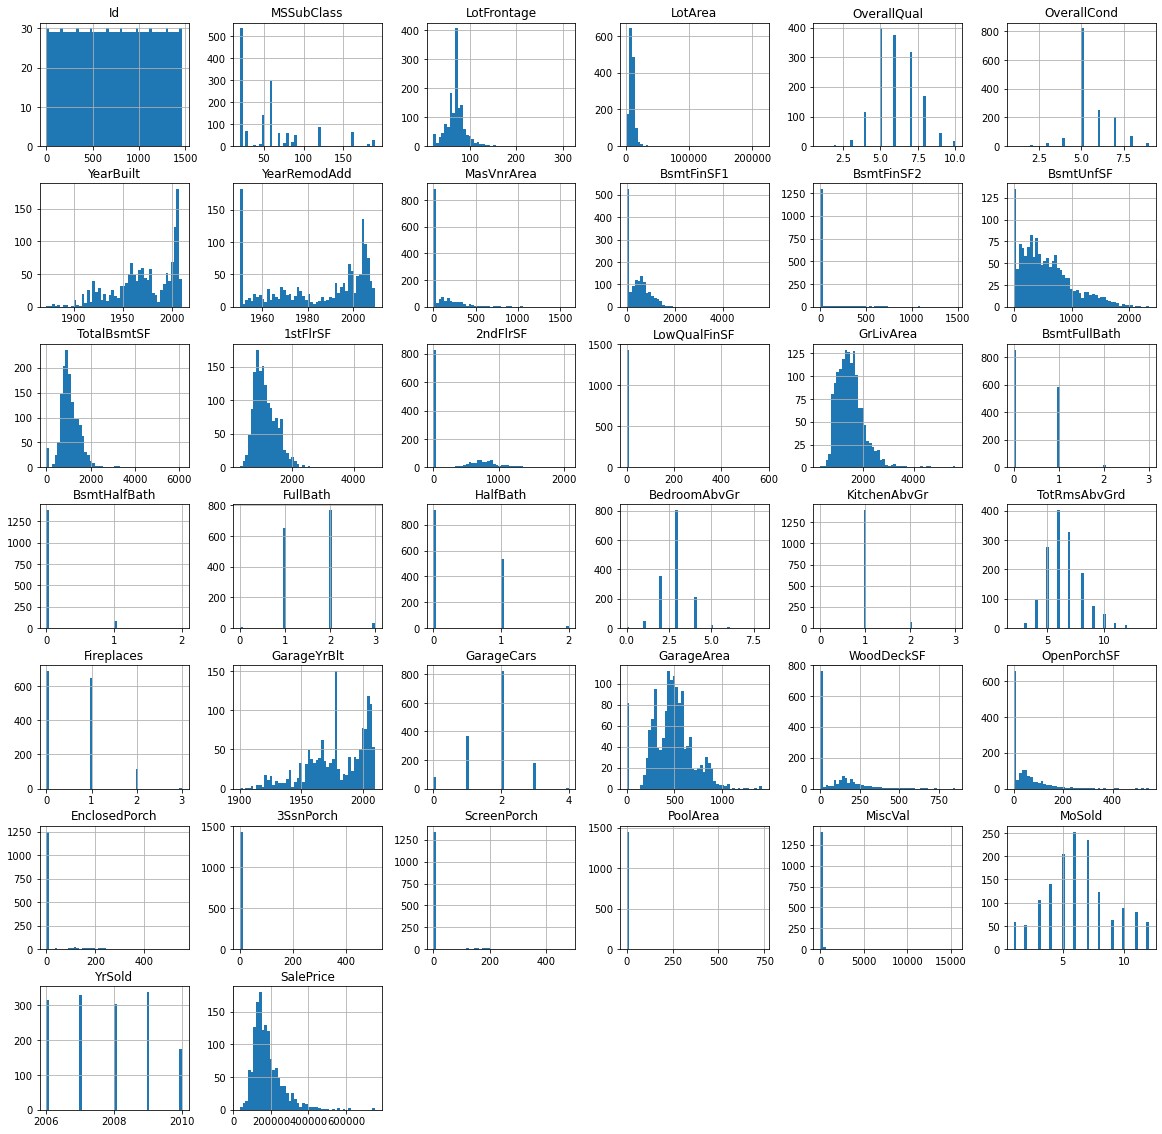

In [29]:
train_data.hist(bins=50,figsize=(20,20))
plt.show()

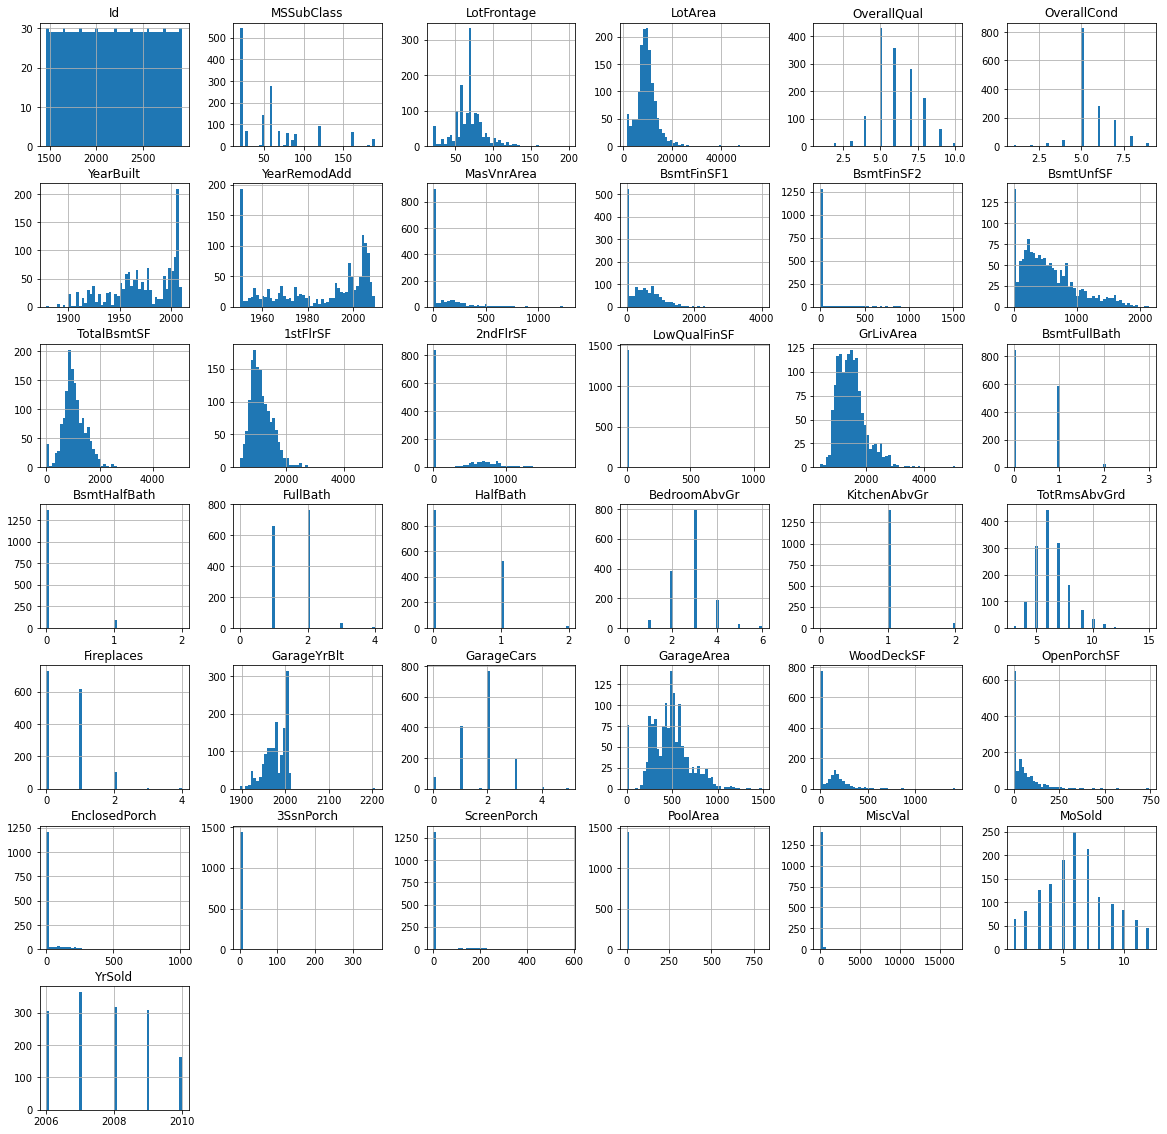

In [30]:
test_data.hist(bins=50,figsize=(20,20))
plt.show()

In [31]:
# correlation
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


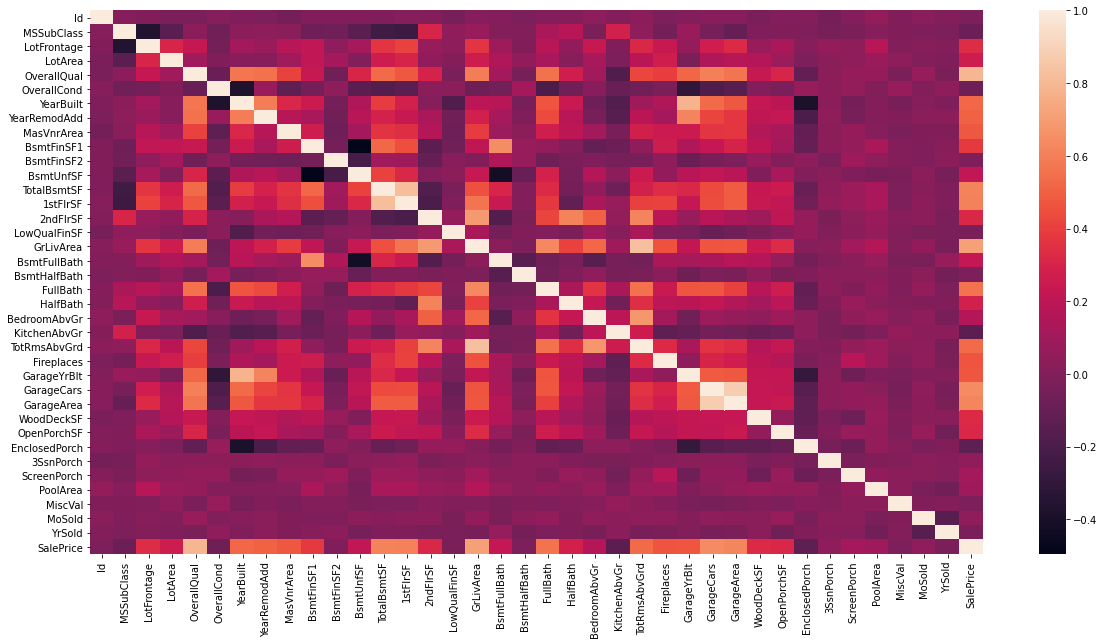

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr())
plt.show()

above diagram, OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageAreas are more positive correlated with Saleprice as compare other variables


### convert categorical data into numerical data

In [33]:
cat_col_train = [col for col in train_data.columns if train_data[col].dtype == object]

In [34]:
cat_col_train

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [35]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [36]:
from sklearn.preprocessing import LabelEncoder  

In [37]:
le = LabelEncoder()

In [38]:
for a in cat_col_train:
    train_data[a]= le.fit_transform(train_data[a])

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

At this position, all categorical data convert into numerical data

In [40]:
cat_col_test = [col for col in test_data.columns if test_data[col].dtype == object]

In [41]:
cat_col_test

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [42]:
for a in cat_col_test:
    test_data[a]= le.fit_transform(test_data[a])

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [44]:
X = train_data.iloc[:,:-1]

In [45]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4


In [63]:
X_test = test_data.iloc[:]

In [64]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [46]:
y = train_data.iloc[:,-1]

In [47]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Split data into training and valadiation set

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=0)

In [50]:
x_train.shape

(978, 75)

In [51]:
y_train.shape

(978,)

In [52]:
x_test.shape

(482, 75)

In [53]:
y_test.shape

(482,)

### fit model

Here, the linear regression model is suitable. because target variable has continuous values.

In [54]:
from sklearn.linear_model import LinearRegression  

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

### mean absolute value

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
train_mae = mean_absolute_error(y_train,pred_train)
test_mae = mean_absolute_error(y_test,pred_test)
print("training mae:",train_mae)
print("testing mae:",test_mae)

training mae: 17536.239636631424
testing mae: 22202.6752692115


In [65]:
final_pred = lr.predict(X_test)

In [66]:
test_data['SalePrice'] = final_pred

In [67]:
test_data[['Id','SalePrice']].head()

,Id,SalePrice
0,1461,124624.003517
1,1462,199263.058392
2,1463,177545.907352
3,1464,185358.863116
4,1465,179512.438103


In [68]:
submission = test_data[['Id','SalePrice']]

In [69]:
submission.head()

,Id,SalePrice
0,1461,124624.003517
1,1462,199263.058392
2,1463,177545.907352
3,1464,185358.863116
4,1465,179512.438103


In [70]:
submission.to_csv('house_pricing_submission.csv', index=False)